In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import ast
from collections import Counter
import itertools

In [2]:
df = pd.read_csv("data/combined_ratings.csv", low_memory=False)

In [3]:
df

,User-ID,ISBN,Book-Rating,bookId,title,series,author,rating,description,language,...,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher
0,276746,0425115801,0,32424.Lightning,Lightning,NaN,Dean Koontz (Goodreads Author),4.06,A storm struck on the night Laura Shane was bo...,English,...,56841,"['21680', '20556', '11771', '2152', '682']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,2202,28,5.16,1996,Berkley Publishing Group
1,276746,055356451X,0,84846.Night_Sins,Night Sins,Deer Lake #1,Tami Hoag (Goodreads Author),3.96,A sensational New York Times bestseller and su...,English,...,10792,"['3593', '4088', '2413', '510', '188']",94.0,['Minnesota (United States)'],https://i.gr-assets.com/images/S/compressed.ph...,65,1,NaN,1995,Bantam
2,276747,0060517794,9,6697.Little_Altars_Everywhere,Little Altars Everywhere,Ya Yas #2,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,English,...,28611,"['5414', '9475', '10279', '2874', '569']",88.0,['United States of America'],https://i.gr-assets.com/images/S/compressed.ph...,476,8,3.39,2003,HarperTorch
3,276747,0671537458,9,122212.Waiting_to_Exhale,Waiting to Exhale,Waiting To Exhale #1,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,English,...,14718,"['5212', '5110', '3440', '742', '214']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,95,1,0.89,1995,Pocket
4,276747,0679776818,8,6259.Birdsong,Birdsong: A Novel of Love and War,French Trilogy #2,Sebastian Faulks,4.09,Published to international critical and popula...,English,...,68404,"['28447', '23829', '11351', '3401', '1376']",93.0,"['France', 'London, England']",https://i.gr-assets.com/images/S/compressed.ph...,6741,90,3.33,1997,Vintage Books USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149309,276690,0312970188,0,1428043.The_Astronaut_s_Wife,The Astronaut's Wife,NaN,Robert Tine,3.65,In this relentlessly gripping psychological th...,English,...,2078,"['540', '606', '671', '191', '70']",87.0,[],https://i.gr-assets.com/images/S/compressed.ph...,78,1,3.07,1999,St. Martin's Press
149310,276690,0440439884,0,41044096-island-of-the-blue-dolphins,Island of the Blue Dolphins,Island of the Blue Dolphins #1,Scott O'Dell,3.84,In the Pacific there is an island that looks l...,English,...,291629,"['94509', '95477', '70357', '21647', '9639']",89.0,"['Island of the Blue Dolphins', 'California (U...",https://i.gr-assets.com/images/S/compressed.ph...,49491,638,NaN,1971,Random House Children's Books
149311,276704,0441007813,0,190361.Obsidian_Butterfly,Obsidian Butterfly,"Anita Blake, Vampire Hunter #9",Laurell K. Hamilton (Goodreads Author),4.09,"The Anita Blake, Vampire Hunter backlist takes...",English,...,60100,"['25976', '18652', '11208', '3196', '1068']",93.0,['United States of America'],https://i.gr-assets.com/images/S/compressed.ph...,2141,30,5.32,2000,Ace Books
149312,276704,0446605409,0,33810.Plum_Island,Plum Island,John Corey #1,Nelson DeMille (Goodreads Author),4.03,The hair-raising suspense of The General's Dau...,English,...,45617,"['15388', '19254', '8662', '1692', '621']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,991,12,3.82,1998,Warner Books


In [4]:
df["Book-Rating"].value_counts()

Book-Rating
0     90777
8     14997
10    11076
9     10424
7      9914
5      5567
6      4403
4      1040
3       656
2       274
1       186
Name: count, dtype: int64

Filter the implicit ratings:

In [5]:
df = df.drop(df[df["Book-Rating"] == 0].index)

In [6]:
df

,User-ID,ISBN,Book-Rating,bookId,title,series,author,rating,description,language,...,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher
2,276747,0060517794,9,6697.Little_Altars_Everywhere,Little Altars Everywhere,Ya Yas #2,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,English,...,28611,"['5414', '9475', '10279', '2874', '569']",88.0,['United States of America'],https://i.gr-assets.com/images/S/compressed.ph...,476,8,3.39,2003,HarperTorch
3,276747,0671537458,9,122212.Waiting_to_Exhale,Waiting to Exhale,Waiting To Exhale #1,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,English,...,14718,"['5212', '5110', '3440', '742', '214']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,95,1,0.89,1995,Pocket
4,276747,0679776818,8,6259.Birdsong,Birdsong: A Novel of Love and War,French Trilogy #2,Sebastian Faulks,4.09,Published to international critical and popula...,English,...,68404,"['28447', '23829', '11351', '3401', '1376']",93.0,"['France', 'London, England']",https://i.gr-assets.com/images/S/compressed.ph...,6741,90,3.33,1997,Vintage Books USA
5,276755,0451166892,5,5043.The_Pillars_of_the_Earth,The Pillars of the Earth,Kingsbridge #1,Ken Follett (Goodreads Author),4.31,Ken Follett is known worldwide as the master o...,English,...,648793,"['354788', '189091', '71541', '21183', '12190']",95.0,['England'],https://i.gr-assets.com/images/S/compressed.ph...,392260,4221,NaN,1996,Signet Book
6,276762,0380711524,5,253993.See_Jane_Run,See Jane Run,NaN,Joy Fielding,3.92,What do you do when you don't know who you are...,English,...,8008,"['2452', '3145', '1861', '430', '120']",93.0,"['Boston, Massachusetts (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,173,2,2.86,1992,Avon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149301,276681,0060938455,9,1097.Fast_Food_Nation,Fast Food Nation: The Dark Side of the All-Ame...,NaN,Eric Schlosser,3.75,Fast food has hastened the malling of our land...,English,...,197560,"['51010', '74615', '50794', '12928', '8213']",89.0,"['Colorado Springs, Colorado (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,3294,55,3.09,2002,Perennial
149305,276688,0553566040,6,116687.Missing_Joseph,Missing Joseph,Inspector Lynley #6,Elizabeth George (Goodreads Author),3.96,Deborah and Simon St. James have taken a holid...,English,...,11641,"['3257', '5213', '2679', '400', '92']",96.0,[],https://i.gr-assets.com/images/S/compressed.ph...,22,1,7.51,1994,Bantam Books
149306,276688,0553575104,6,31373.In_Pursuit_of_the_Proper_Sinner,In Pursuit of the Proper Sinner,Inspector Lynley #10,Elizabeth George (Goodreads Author),4.10,A theatrical producer shoots himself on the ni...,English,...,12659,"['4382', '5629', '2307', '274', '67']",97.0,['United Kingdom'],https://i.gr-assets.com/images/S/compressed.ph...,47,2,2.86,2000,Bantam Books
149308,276688,0684804484,10,18728.No_Ordinary_Time,No Ordinary Time: Franklin and Eleanor Rooseve...,NaN,Doris Kearns Goodwin,4.18,"Winner of the Pulitzer for History, No Ordinar...",English,...,40982,"['20382', '11898', '5574', '1819', '1309']",92.0,[],https://i.gr-assets.com/images/S/compressed.ph...,231,5,7.08,1995,Simon &amp; Schuster


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58537 entries, 2 to 149313
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              58537 non-null  int64  
 1   ISBN                 58537 non-null  object 
 2   Book-Rating          58537 non-null  int64  
 3   bookId               58537 non-null  object 
 4   title                58537 non-null  object 
 5   series               23360 non-null  object 
 6   author               58537 non-null  object 
 7   rating               58537 non-null  float64
 8   description          58334 non-null  object 
 9   language             57177 non-null  object 
 10  genres               58537 non-null  object 
 11  characters           58537 non-null  object 
 12  bookFormat           58274 non-null  object 
 13  edition              6200 non-null   object 
 14  pages                58121 non-null  object 
 15  publishDate          58309 non-null  obj

The "edition" and "series" columns can be dropped as they contain many NaNs.

In [8]:
df.drop(columns=["edition", "series"], axis=1, inplace=True)

The "Year-Of-Publication", "firstPublishDate" and "publishDate" contain similar information. We will keep the year of publication.

In [9]:
df.drop(columns=["firstPublishDate", "publishDate"], axis=1, inplace=True)

We can drop the id, the description of the book, the setting, the format, as well as the list of characters and cover image.

In [10]:
df.drop(columns=["bookId", "coverImg", "characters", "description", "bookFormat", "setting"], axis=1, inplace=True)

In [11]:
df

,User-ID,ISBN,Book-Rating,title,author,rating,language,genres,pages,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher
2,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,English,"['Fiction', 'Chick Lit', 'Southern', 'Contempo...",288,[],28611,"['5414', '9475', '10279', '2874', '569']",88.0,476,8,3.39,2003,HarperTorch
3,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,English,"['Fiction', 'African American', 'Romance', 'Ch...",448,[],14718,"['5212', '5110', '3440', '742', '214']",94.0,95,1,0.89,1995,Pocket
4,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,English,"['Historical Fiction', 'Fiction', 'War', 'Clas...",483,['Premio Internacional de Novela Histórica Ciu...,68404,"['28447', '23829', '11351', '3401', '1376']",93.0,6741,90,3.33,1997,Vintage Books USA
5,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,English,"['Historical Fiction', 'Fiction', 'Historical'...",976,[],648793,"['354788', '189091', '71541', '21183', '12190']",95.0,392260,4221,NaN,1996,Signet Book
6,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,English,"['Mystery', 'Thriller', 'Fiction', 'Suspense',...",416,[],8008,"['2452', '3145', '1861', '430', '120']",93.0,173,2,2.86,1992,Avon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149301,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,English,"['Nonfiction', 'Food', 'Health', 'Sociology', ...",399,['Puddly Award for Nonfiction (2003)'],197560,"['51010', '74615', '50794', '12928', '8213']",89.0,3294,55,3.09,2002,Perennial
149305,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,English,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",576,[],11641,"['3257', '5213', '2679', '400', '92']",96.0,22,1,7.51,1994,Bantam Books
149306,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,English,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",718,[],12659,"['4382', '5629', '2307', '274', '67']",97.0,47,2,2.86,2000,Bantam Books
149308,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,English,"['History', 'Biography', 'Nonfiction', 'Americ...",633,"['Pulitzer Prize for History (1995)', 'Ambassa...",40982,"['20382', '11898', '5574', '1819', '1309']",92.0,231,5,7.08,1995,Simon &amp; Schuster


Convert the "awards" column into the number of awards:

In [12]:
df["awards"] = df["awards"].apply(lambda x: len(ast.literal_eval(x)))

In [13]:
df["language"].value_counts()

language
English                        56560
French                           337
Spanish                          153
German                            85
Dutch                             15
Indonesian                         9
Multiple languages                 5
Portuguese                         4
Malay                              4
Greek, Ancient (to 1453)           1
Italian                            1
English, Middle (1100-1500)        1
Polish                             1
Czech                              1
Name: count, dtype: int64

The "language" can be incorrectly labeled, as many books are translated. There are also a few non-English books, so it's best to drop the column.

In [14]:
df.drop(columns=["language"], axis=1, inplace=True)

Let's convert the ratings by stars into separate columns:

In [15]:
df.reset_index(drop=True, inplace=True)
df

,User-ID,ISBN,Book-Rating,title,author,rating,genres,pages,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,"['Fiction', 'Chick Lit', 'Southern', 'Contempo...",288,0,28611,"['5414', '9475', '10279', '2874', '569']",88.0,476,8,3.39,2003,HarperTorch
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,"['Fiction', 'African American', 'Romance', 'Ch...",448,0,14718,"['5212', '5110', '3440', '742', '214']",94.0,95,1,0.89,1995,Pocket
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,"['Historical Fiction', 'Fiction', 'War', 'Clas...",483,1,68404,"['28447', '23829', '11351', '3401', '1376']",93.0,6741,90,3.33,1997,Vintage Books USA
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,"['Historical Fiction', 'Fiction', 'Historical'...",976,0,648793,"['354788', '189091', '71541', '21183', '12190']",95.0,392260,4221,NaN,1996,Signet Book
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,"['Mystery', 'Thriller', 'Fiction', 'Suspense',...",416,0,8008,"['2452', '3145', '1861', '430', '120']",93.0,173,2,2.86,1992,Avon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,"['Nonfiction', 'Food', 'Health', 'Sociology', ...",399,1,197560,"['51010', '74615', '50794', '12928', '8213']",89.0,3294,55,3.09,2002,Perennial
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",576,0,11641,"['3257', '5213', '2679', '400', '92']",96.0,22,1,7.51,1994,Bantam Books
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",718,0,12659,"['4382', '5629', '2307', '274', '67']",97.0,47,2,2.86,2000,Bantam Books
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"['History', 'Biography', 'Nonfiction', 'Americ...",633,2,40982,"['20382', '11898', '5574', '1819', '1309']",92.0,231,5,7.08,1995,Simon &amp; Schuster


In [16]:
ratings = df["ratingsByStars"].apply(lambda x: [int(rating) for rating in ast.literal_eval(x)])
ratings

0               [5414, 9475, 10279, 2874, 569]
1                 [5212, 5110, 3440, 742, 214]
2            [28447, 23829, 11351, 3401, 1376]
3        [354788, 189091, 71541, 21183, 12190]
4                 [2452, 3145, 1861, 430, 120]
                         ...                  
58532       [51010, 74615, 50794, 12928, 8213]
58533              [3257, 5213, 2679, 400, 92]
58534              [4382, 5629, 2307, 274, 67]
58535         [20382, 11898, 5574, 1819, 1309]
58536       [39300, 45003, 43988, 16245, 6020]
Name: ratingsByStars, Length: 58537, dtype: object

In [17]:
ratings_df = pd.DataFrame(ratings.tolist(), columns=["5star", "4star", "3star", "2star", "1star"])

In [18]:
pd.concat([df, ratings_df], axis=1, ignore_index=False)

,User-ID,ISBN,Book-Rating,title,author,rating,genres,pages,awards,numRatings,...,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher,5star,4star,3star,2star,1star
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,"['Fiction', 'Chick Lit', 'Southern', 'Contempo...",288,0,28611,...,476,8,3.39,2003,HarperTorch,5414.0,9475.0,10279.0,2874.0,569.0
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,"['Fiction', 'African American', 'Romance', 'Ch...",448,0,14718,...,95,1,0.89,1995,Pocket,5212.0,5110.0,3440.0,742.0,214.0
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,"['Historical Fiction', 'Fiction', 'War', 'Clas...",483,1,68404,...,6741,90,3.33,1997,Vintage Books USA,28447.0,23829.0,11351.0,3401.0,1376.0
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,"['Historical Fiction', 'Fiction', 'Historical'...",976,0,648793,...,392260,4221,NaN,1996,Signet Book,354788.0,189091.0,71541.0,21183.0,12190.0
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,"['Mystery', 'Thriller', 'Fiction', 'Suspense',...",416,0,8008,...,173,2,2.86,1992,Avon,2452.0,3145.0,1861.0,430.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,"['Nonfiction', 'Food', 'Health', 'Sociology', ...",399,1,197560,...,3294,55,3.09,2002,Perennial,51010.0,74615.0,50794.0,12928.0,8213.0
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",576,0,11641,...,22,1,7.51,1994,Bantam Books,3257.0,5213.0,2679.0,400.0,92.0
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",718,0,12659,...,47,2,2.86,2000,Bantam Books,4382.0,5629.0,2307.0,274.0,67.0
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"['History', 'Biography', 'Nonfiction', 'Americ...",633,2,40982,...,231,5,7.08,1995,Simon &amp; Schuster,20382.0,11898.0,5574.0,1819.0,1309.0


In [19]:
df["genres"].apply(lambda x: len(ast.literal_eval(x))).value_counts()

genres
10    56420
9       301
0       277
7       267
4       253
8       240
5       188
6       175
2       152
1       139
3       125
Name: count, dtype: int64

Most books are labeled with 10 genres.

In [20]:
genre_list = df["genres"].apply(lambda x: ast.literal_eval(x)).tolist()
genre_list = list(itertools.chain(*genre_list))
len(set(genre_list))

735

There are 735 different genres. Let's try to limit the number.

In [21]:
Counter(genre_list).most_common(20)

[('Fiction', 50928),
 ('Novels', 24739),
 ('Adult', 19886),
 ('Mystery', 19383),
 ('Contemporary', 18583),
 ('Thriller', 16861),
 ('Romance', 16169),
 ('Classics', 15476),
 ('Suspense', 15271),
 ('Fantasy', 15267),
 ('Historical Fiction', 14531),
 ('Adult Fiction', 13926),
 ('Literature', 12839),
 ('Mystery Thriller', 12672),
 ('Crime', 11706),
 ('Audiobook', 10737),
 ('Historical', 10238),
 ('Adventure', 8818),
 ('Science Fiction', 8762),
 ('Young Adult', 8286)]

We will keep only the 20 most common genres.

In [22]:
top20_genres = [g for g, c in Counter(genre_list).most_common(20)]

In [23]:
df["genres"].apply(lambda x: [x for x in ast.literal_eval(x) if x in top20_genres])

0        [Fiction, Contemporary, Adult Fiction, Histori...
1        [Fiction, Romance, Contemporary, Novels, Adult...
2        [Historical Fiction, Fiction, Classics, Histor...
3        [Historical Fiction, Fiction, Historical, Fant...
4        [Mystery, Thriller, Fiction, Suspense, Mystery...
                               ...                        
58532                                                   []
58533    [Mystery, Fiction, Crime, Mystery Thriller, Th...
58534    [Mystery, Fiction, Crime, Mystery Thriller, Th...
58535                                         [Historical]
58536    [Fiction, Science Fiction, Thriller, Fantasy, ...
Name: genres, Length: 58537, dtype: object

In [24]:
for genre in top20_genres:
    df[genre] = df["genres"].apply(lambda x: 1 if genre in x else 0)

In [25]:
df

,User-ID,ISBN,Book-Rating,title,author,rating,genres,pages,awards,numRatings,...,Historical Fiction,Adult Fiction,Literature,Mystery Thriller,Crime,Audiobook,Historical,Adventure,Science Fiction,Young Adult
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,"['Fiction', 'Chick Lit', 'Southern', 'Contempo...",288,0,28611,...,1,1,0,0,0,0,1,0,0,0
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,"['Fiction', 'African American', 'Romance', 'Ch...",448,0,14718,...,0,1,0,0,0,0,0,0,0,0
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,"['Historical Fiction', 'Fiction', 'War', 'Clas...",483,1,68404,...,1,0,1,0,0,0,1,0,0,0
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,"['Historical Fiction', 'Fiction', 'Historical'...",976,0,648793,...,1,0,1,0,0,1,1,0,0,0
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,"['Mystery', 'Thriller', 'Fiction', 'Suspense',...",416,0,8008,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,"['Nonfiction', 'Food', 'Health', 'Sociology', ...",399,1,197560,...,0,0,0,0,0,0,0,0,0,0
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",576,0,11641,...,0,0,1,1,1,0,0,0,0,0
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",718,0,12659,...,0,0,1,1,1,1,0,0,0,0
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"['History', 'Biography', 'Nonfiction', 'Americ...",633,2,40982,...,0,0,0,0,0,0,1,0,0,0


In [26]:
df.drop(columns=["genres", "ratingsByStars"], axis=1, inplace=True)

In [27]:
df

,User-ID,ISBN,Book-Rating,title,author,rating,pages,awards,numRatings,likedPercent,...,Historical Fiction,Adult Fiction,Literature,Mystery Thriller,Crime,Audiobook,Historical,Adventure,Science Fiction,Young Adult
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,288,0,28611,88.0,...,1,1,0,0,0,0,1,0,0,0
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,448,0,14718,94.0,...,0,1,0,0,0,0,0,0,0,0
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,483,1,68404,93.0,...,1,0,1,0,0,0,1,0,0,0
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,976,0,648793,95.0,...,1,0,1,0,0,1,1,0,0,0
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,416,0,8008,93.0,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,399,1,197560,89.0,...,0,0,0,0,0,0,0,0,0,0
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,576,0,11641,96.0,...,0,0,1,1,1,0,0,0,0,0
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,718,0,12659,97.0,...,0,0,1,1,1,1,0,0,0,0
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,633,2,40982,92.0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df["price"] = pd.to_numeric(df["price"], downcast="float", errors="coerce")

In [29]:
sum(df["price"].isna())

7439

There are a lot of books with missing prices. We can sample from the price distribution.

<Axes: >

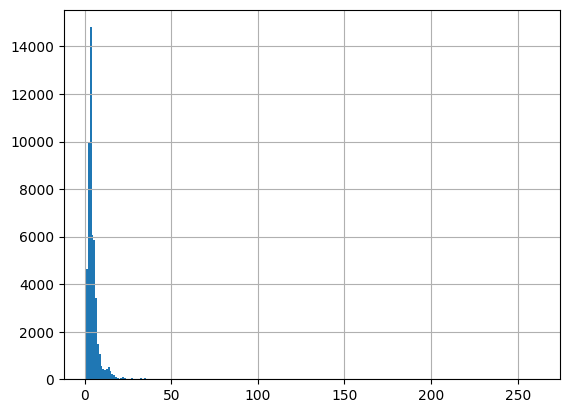

In [30]:
df["price"].dropna().hist(bins=250)

In [31]:
mean_price = df["price"].mean()
std_price = df["price"].std()
random_values = np.random.normal(mean_price, std_price, df["price"].isnull().sum())
while any(random_values < 0):
    random_values[random_values < 0.01] = np.random.normal(mean_price, std_price, (random_values < 0.01).sum())
df.loc[df["price"].isnull(), "price"] = random_values

C:\Users\venki\AppData\Local\Temp\ipykernel_39436\190608111.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 8.35332479  5.07759878  5.62520653 ... 16.29321794  5.22696717
 12.72686005]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df.loc[df["price"].isnull(), "price"] = random_values


<Axes: >

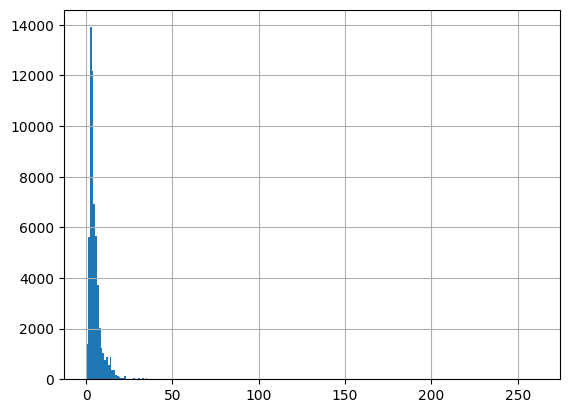

In [32]:
df["price"].dropna().hist(bins=250)

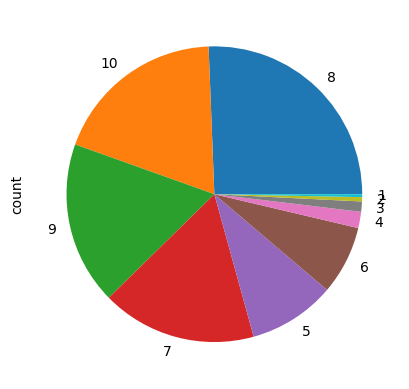

In [33]:
df["Book-Rating"].value_counts().plot(kind="pie")
plt.show()

Most of the available user reviews are positive.

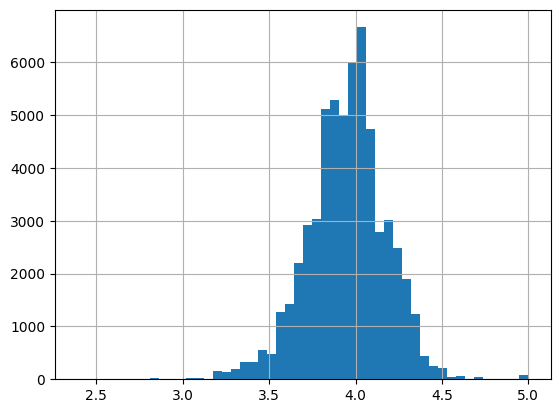

In [34]:
df["rating"].hist(bins=50)
plt.show()

Most of the overall books available are positively reviewed generally.

In [35]:
df["Publisher"].value_counts()

Publisher
Ballantine Books            3921
Warner Books                2908
Berkley Publishing Group    2645
Pocket                      2446
Dell                        2272
                            ... 
Servant Pubns                  1
Authorlink                     1
Irwin Pub                      1
Quartet Books                  1
Gold Leaf Press (WA)           1
Name: count, Length: 1119, dtype: int64

In [36]:
df.drop(columns=["Publisher"], axis=1, inplace=True)

In [37]:
df

,User-ID,ISBN,Book-Rating,title,author,rating,pages,awards,numRatings,likedPercent,...,Historical Fiction,Adult Fiction,Literature,Mystery Thriller,Crime,Audiobook,Historical,Adventure,Science Fiction,Young Adult
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,288,0,28611,88.0,...,1,1,0,0,0,0,1,0,0,0
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,448,0,14718,94.0,...,0,1,0,0,0,0,0,0,0,0
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,483,1,68404,93.0,...,1,0,1,0,0,0,1,0,0,0
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,976,0,648793,95.0,...,1,0,1,0,0,1,1,0,0,0
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,416,0,8008,93.0,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,399,1,197560,89.0,...,0,0,0,0,0,0,0,0,0,0
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,576,0,11641,96.0,...,0,0,1,1,1,0,0,0,0,0
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,718,0,12659,97.0,...,0,0,1,1,1,1,0,0,0,0
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,633,2,40982,92.0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
df["author"].value_counts()

author
John Grisham (Goodreads Author)       1840
Michael Crichton                      1205
Stephen King (Goodreads Author)       1021
Dean Koontz (Goodreads Author)         745
Nicholas Sparks (Goodreads Author)     638
                                      ... 
Kay Arthur                               1
Lynessa Layne (Goodreads Author)         1
Aral Bereux                              1
Thomas Sowell                            1
Ann Tatlock                              1
Name: count, Length: 4518, dtype: int64

In [39]:
df.drop(columns=["author"], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58537 entries, 0 to 58536
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              58537 non-null  int64  
 1   ISBN                 58537 non-null  object 
 2   Book-Rating          58537 non-null  int64  
 3   title                58537 non-null  object 
 4   rating               58537 non-null  float64
 5   pages                58121 non-null  object 
 6   awards               58537 non-null  int64  
 7   numRatings           58537 non-null  int64  
 8   likedPercent         58533 non-null  float64
 9   bbeScore             58537 non-null  int64  
 10  bbeVotes             58537 non-null  int64  
 11  price                58537 non-null  float64
 12  Year-Of-Publication  58537 non-null  int64  
 13  Fiction              58537 non-null  int64  
 14  Novels               58537 non-null  int64  
 15  Adult                58537 non-null 

In [41]:
def contains_letter(x):
    if isinstance(x, str) and re.search('[a-zA-Z]', x):
        return np.nan
    return x

df["pages"] = df["pages"].apply(contains_letter)

In [42]:
df["pages"] = df["pages"].astype("Int64")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58537 entries, 0 to 58536
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              58537 non-null  int64  
 1   ISBN                 58537 non-null  object 
 2   Book-Rating          58537 non-null  int64  
 3   title                58537 non-null  object 
 4   rating               58537 non-null  float64
 5   pages                58120 non-null  Int64  
 6   awards               58537 non-null  int64  
 7   numRatings           58537 non-null  int64  
 8   likedPercent         58533 non-null  float64
 9   bbeScore             58537 non-null  int64  
 10  bbeVotes             58537 non-null  int64  
 11  price                58537 non-null  float64
 12  Year-Of-Publication  58537 non-null  int64  
 13  Fiction              58537 non-null  int64  
 14  Novels               58537 non-null  int64  
 15  Adult                58537 non-null 

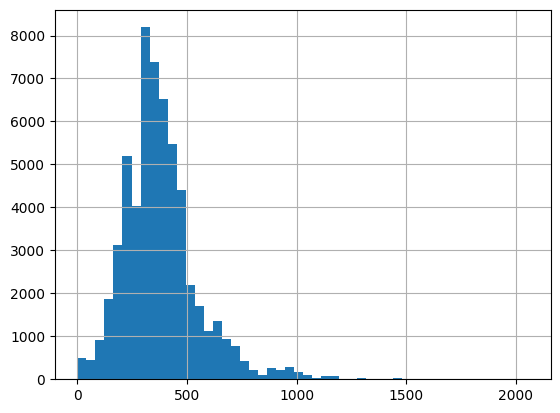

In [44]:
df["pages"].hist(bins=50)
plt.show()

In [45]:
mean_pages = df["pages"].mean()
std_pages = df["pages"].std()
random_values = np.round(np.random.normal(mean_pages, std_pages, df["pages"].isnull().sum()))
while any(random_values < 1):
    random_values[random_values < 1] = np.round(np.random.normal(mean_pages, std_pages, (random_values < 1).sum()))
df.loc[df["pages"].isnull(), "pages"] = random_values

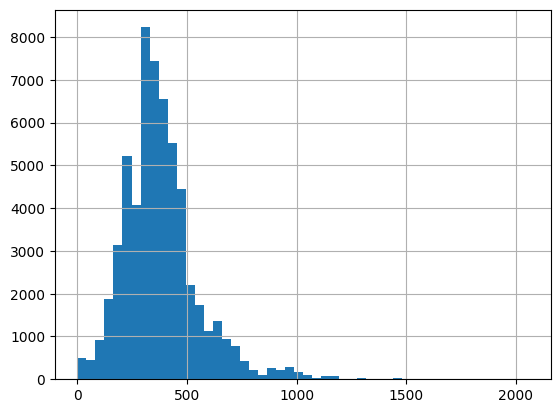

In [46]:
df["pages"].hist(bins=50)
plt.show()

In [48]:
df.to_csv("data/preprocessed_combined.csv", index=False)